In [1]:
import belasting as blst
import pandas as pd

### Employee (non-ZZP)

In [8]:
year = 2025

# annual (from Jaaropgave)
jaar_data = {
    'Client_1': {
        'company': 'Comapany_1',
        'annual_income': 15000,
        'paid_tax': 867},
    'Client_2': {
        'company': "Comapany_2",
        'annual_income': [24000, 12000],
        'paid_tax': [901, 389]},
}

apply_zvw = False  # Health Insurance is not applied (paid by an employer)

In [9]:
def act_borders(col):
    """
    Apply CSS styling to a pandas Series to highlight values with borders and conditional coloring.   
    """
    props = []
    for i, v in enumerate(col):
        p = 'border-left: 3px solid #d3d3d3; border-right: 3px solid #d3d3d3'
        if i == 0:
            p += '; border-top: 3px solid #d3d3d3'
        if i == len(col) - 1:
            p += '; border-bottom: 3px solid #d3d3d3'
        p += f';color: {"green" if v > 0 else "red" if v < 0 else "black"}; font-weight: bold'
        props.append(p)
    
    return props


res = []

for name, year_data in jaar_data.items():

    if isinstance(year_data['annual_income'], list):
        year_data['annual_income'] = sum(year_data['annual_income'])
    if isinstance(year_data['paid_tax'], list):
        year_data['paid_tax'] = sum(year_data['paid_tax'])

    tax_data = blst.box1_tax_calculate(
        income=year_data['annual_income'],
        year=year, 
        apply_zvw=apply_zvw
        )
    year_data['Name'] = name
    year_data.update(tax_data)
    res.append(year_data)

    
df_ = pd.DataFrame(res)
df_ = df_.drop(df_.columns[(df_ == 0).all(axis=0)], axis=1).set_index('Name')  # Remove zero-ed columns
df_ = df_[['year'] + [c for c in df_.columns if c != 'year']]    # move `year` column to the first position
df_.insert(2, 'RETURN', df_['paid_tax'] - df_['box1_tax_netto'])

# Style the dataframe 
highlight_cols = ['paid_tax', 'box1_tax_netto']

def highlight_target_columns(col):
    if col.name in highlight_cols:
        return ['background-color: #fff3cd; color: #333333; font-weight: bold'] * len(col)
    else:
        return [''] * len(col)

df_.style.apply(highlight_target_columns, axis=0)\
    .apply(act_borders, subset='RETURN')\
    .format(precision=2)


,year,company,RETURN,annual_income,paid_tax,tax_base,arbeidskorting,algeemene_korting,total_tax_korting,box1_tax,box1_tax_netto,effective_tax_rate,income_netto,income_netto_monthly
Name,,,,,,,,,,,,,,
Client_1,2025,Comapany_1,392.15,15000,867,15000,1830.15,3068.00,4898.15,5373.00,474.85,3.17%,14525.15,1210.43
Client_2,2025,Comapany_2,-3579.13,36000,1290,36000,5439.30,2586.77,8026.07,12895.20,4869.13,13.53%,31130.87,2594.24


### ZZP

In [5]:
year = 2026

revs = range(30000, 65000, 5000)  # income revenues
# revs = [36400]  # income revenues

zzp = True
apply_zvw = True       # False - ZVW reimbursement
costs = {
    'business': 3500,
    'pension': 6000
    }

In [ ]:
res = [blst.box1_tax_calculate(
            rev, year, True, costs, apply_zvw=apply_zvw) for rev in revs]
df = pd.DataFrame(res)
df = df.drop(df.columns[(df == 0).all(axis=0)], axis=1).set_index('annual_income')  # Remove zero-ed columns

df

,year,zzp,total_cost,zzp_deduction,tax_base,arbeidskorting,algeemene_korting,total_tax_korting,box1_tax,box1_tax_netto,effective_tax_rate,health_insurance,health_insurance_monthly,income_netto,income_netto_monthly
annual_income,,,,,,,,,,,,,,,
70000,2026,True,9500,3323,49915.52,5403.54,1823.91,7227.45,18044.49,10817.03,21.67%,2420.90,201.74,47262.06,3938.51
75000,2026,True,9500,3323,54280.52,5119.38,1544.64,6664.02,19683.98,13019.96,23.99%,2632.61,219.38,49847.43,4153.95
80000,2026,True,9500,3323,58645.52,4835.22,1265.37,6100.58,21323.48,15222.89,25.96%,2844.31,237.03,52432.80,4369.40
85000,2026,True,9500,3323,63010.52,4551.05,986.10,5537.15,22962.97,17425.82,27.66%,3056.01,254.67,55018.17,4584.85
90000,2026,True,9500,3323,67375.52,4266.89,706.82,4973.72,24602.46,19628.75,29.13%,3267.71,272.31,57603.54,4800.30
95000,2026,True,9500,3323,71740.52,3982.73,427.55,4410.28,26241.96,21831.68,30.43%,3479.42,289.95,60188.91,5015.74
100000,2026,True,9500,3323,76105.52,3698.57,148.28,3846.85,27881.45,24034.60,31.58%,3691.12,307.59,62774.28,5231.19
105000,2026,True,9500,3323,80470.52,3414.41,0.00,3414.41,29765.06,26350.65,32.75%,3851.34,320.94,65298.01,5441.50


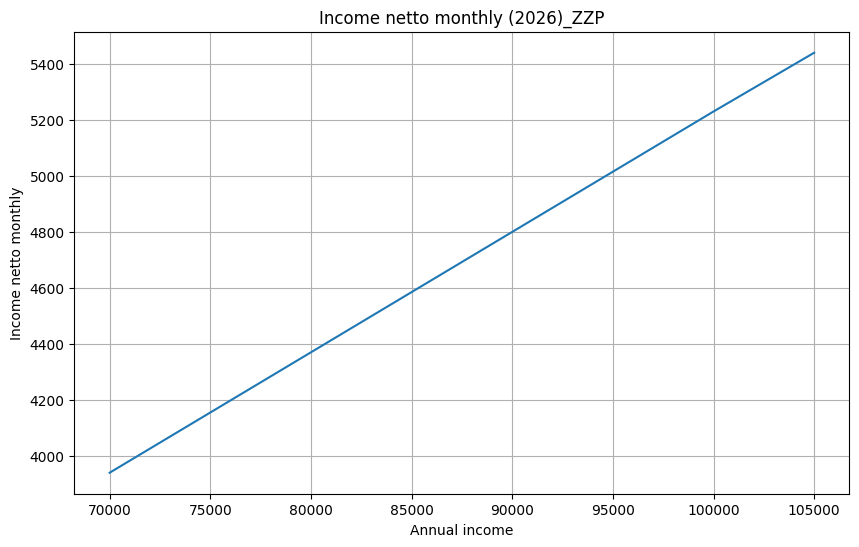

In [ ]:
df.plot(
    kind='line',
    # x='annual_income',
    y='income_netto_monthly',
    title=f'Income netto monthly ({year})' + '_ZZP' * zzp,
    xlabel='Annual income',
    ylabel='Income netto monthly',
    figsize=(10, 6),
    grid=True,
    legend=False
    );